# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the CSV

On my computer, this notebook is saved in the same directory as `bbc-news-data.csv`, which can be downloaded [on Kaggle](https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive).

In [2]:
df = pd.read_csv("bbc-news-data.csv", sep="\t")
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


# Counting unique words

In [3]:
# remove non-alphabetical from word
import  re

def adjust_word(word):
    copy = word.lower()
    copy = re.sub(r"[^a-z]", '', copy)
    return copy

In [4]:
word_counts = np.zeros(len(df))
unique_words = {}
doc_uniques = []
unique_per_doc = np.zeros(len(df))

for i in range(len(df)):
    unique_doc = {}
    df.iloc[i].content = df.iloc[i].content.lower()
    df.iloc[i].content = re.sub(r'-', ' ', df.iloc[i].content)
    df.iloc[i].content = re.sub(r'[^a-z ]', '', df.iloc[i].content)
    df.iloc[i].content = re.sub(r' +', ' ', df.iloc[i].content)
    words = df.iloc[i].content.split()
    word_counts[i] = len(words)
    for word in words:
        adj = adjust_word(word)
        if len(adj) == 0: continue
        if adj in unique_words.keys():
            unique_words[adj] += 1
        else:
            unique_words[adj] = 1

        if adj in unique_doc.keys():
            unique_doc[adj] += 1
        else:
            unique_doc[adj] = 1
    doc_uniques.append(unique_doc)

unique_per_doc = [len(doc.keys()) for doc in doc_uniques]

# Statistics and Plot

total number of words: 835743
unique words: 29068
number of documents: 2225
mean unique words per document: 198.8161797752809
max word count: 4406.0
min word count: 84.0
mean: 375.61483146067417
std: 236.9639681618158
2203 articles with <1000 words
22 articles with >=1000 words


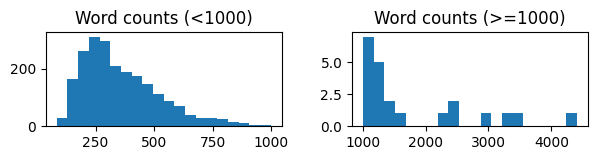

In [21]:
# statistics
print(f"total number of words: {int(sum(word_counts))}")
print(f"unique words: {len(unique_words.keys())}")
print(f"number of documents: {len(word_counts)}")
print(f"mean unique words per document: {np.mean(unique_per_doc)}")
print(f"max word count: {np.max(word_counts)}")
print(f"min word count: {np.min(word_counts)}")
print(f"mean: {np.mean(word_counts)}")
print(f"std: {np.std(word_counts)}")

normal_word_counts = word_counts[word_counts < 1000]
big_counts = word_counts[word_counts >= 1000]

print(f"{len(normal_word_counts)} articles with <1000 words")
print(f"{len(big_counts)} articles with >=1000 words")

fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=2)

ax[0].hist(normal_word_counts, bins=20)
ax[1].hist(big_counts, bins=20)

ax[0].set_title("Word counts (<1000)")
ax[1].set_title("Word counts (>=1000)")

ratio = .4
for i in [0,1]:
    #get x and y limits
    x_left, x_right = ax[i].get_xlim()
    y_low, y_high = ax[i].get_ylim()

    #set aspect ratio
    ax[i].set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

fname = "./Images/exploration_hist.pdf"
fig.savefig(fname=fname)

plt.show()

In [26]:
curr = 0
for val in unique_words.values():
    if val==1:
        curr += 1

print(f"{curr} words appear exactly once in the entire data set")

9987 words appear exactly once in the entire data set


# Cleaning

In [27]:
# load natural language toolkit to remove the stopwords
# uncomment the following two lines if you have not downloaded the stopwords
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [28]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'said', 'would', 'also', 'one', 'could', 'bn', 'bbc', 'like', 'mr'])

# I'm not actually sure how useful this is in practice 
# we'll still need to process each document with the counts and I don't know how to do that efficiently space-wise
# maybe we'll deal with it later and I'll forget to update this cell

all_words = list(unique_words.keys())
for word in all_words:
    if unique_words[word] <= 1 or word in stop_words:
        del unique_words[word]
        # delete it from the key lists
        for doc in doc_uniques:
            if word in doc.keys():
                del doc[word]

# updated word count
print(f"unique words after removal: {len(unique_words.keys())}")

unique words after removal: 18936


In [29]:
# showing which words show up in order of frequency
sorted_keys = sorted(unique_words.keys(), key=lambda word: -unique_words[word])
sorted_counts = sorted(unique_words.values(), key=lambda x: -x)

for word, count in zip(sorted_keys, sorted_counts):
    print(f"{count}\t: {word}")

2072	: year
1967	: people
1909	: new
1847	: us
1388	: last
1345	: first
1312	: time
1268	: two
1217	: years
1027	: government
999	: world
966	: best
930	: make
929	: uk
910	: told
874	: get
863	: made
835	: game
829	: many
827	: three
824	: back
824	: film
807	: music
804	: well
777	: next
753	: number
737	: way
736	: take
733	: added
730	: set
682	: market
675	: may
668	: says
655	: home
644	: good
636	: labour
633	: election
633	: games
632	: going
621	: much
617	: still
615	: company
605	: since
603	: second
601	: work
595	: think
595	: go
584	: win
580	: say
577	: million
575	: part
569	: top
562	: play
556	: technology
554	: want
552	: public
550	: show
548	: week
545	: high
544	: see
537	: party
536	: british
534	: firm
528	: five
528	: used
524	: england
522	: players
519	: mobile
517	: european
514	: however
513	: news
513	: minister
509	: end
505	: expected
496	: even
489	: four
489	: blair
487	: months
482	: sales
478	: tv
477	: six
473	: already
471	: put
469	: plans
467	: o

# Reindexing uniques

I know it's slow 😭 don't worry about it

In [30]:
# set up an index system for the unique words
indexing_uniques = [{} for _ in range(len(doc_uniques))]
index_map = {}
for idx, word in enumerate(unique_words.keys()):
    index_map[idx] = word
    for jdx, doc in enumerate(doc_uniques):
        if word in doc.keys():
            indexing_uniques[jdx][idx] = doc[word]

# Discussion on LDA

## Sources
I got a lot of help from the following sources:
- [Wikipedia: Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution)
- [Jordan Boyd-Graber (YouTube): Topic Models: Variational Inference for Latent Dirichlet Allocation (with Xanda Schofield)
](https://www.youtube.com/watch?v=smfWKhDcaoA)
    - huge help for computing the expectation of the log probability of a Dirichlet (digamma stuff starts around 5:00)
    - there's also a part 2 of the video that I won't link here
- [Wikipedia: Latent Dirichlet allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)
    - The [Generative Process](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation#Generative_process) section is really nice
- [Wikipedia: Variational Bayesian methods](https://en.wikipedia.org/wiki/Variational_Bayes)
    - I like the [step-by-step recipe](https://en.wikipedia.org/wiki/Variational_Bayesian_methods#Step-by-step_recipe) and it matches up with the in-class notes
    - You might need to be comfortable with Bayesian networks to convert the joint probability to the product of conditionals
- [Blei: Probabilistic Topic Models](https://www.cs.columbia.edu/~blei/papers/Blei2012.pdf)
- [Blei, Ng, Jordan: Latent Dirichlet Allocation](https://jmlr.org/papers/volume3/blei03a/blei03a.pdf)

## Model description
We have a graphical model
$$
\alpha \to \theta_d \to z_{dn} \to w_{dn} \leftarrow \beta_k \leftarrow \eta
$$
where $\alpha$ and $\eta$ are hyperparameters that affect the density of the Dirichlet distributions in $\theta_d$ and $\beta_k$.

There are $D$ many $\theta_d$, where each $\theta_d$ is a distribution of topics for document $d$ (assuming a few topics per document might make sense). This means $\theta_d \in \mathbb{R}^K$ for all $d$. Note that $D$ is the number of documents in the data set.

There are $K$ many $\beta_k$, where each $\beta_k$ is a distribution of words in topic $k$ (assuming a few key words per topic might make sense). This means $\beta_k \in \mathbb{R}^V$ for all $k$, where $V$ is the number of unique words in the document set (the letter $V$ is used in the [Generative Process](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation#Generative_process) section of the LDA wiki). Note that $K$ is the number of topics we are asking our model to find; it's a hyperparameter.

Next, $z_{dn}$ takes values $1$ through $K$, where $z_{dn} = l$ indicates that the $n$-th word of document $d$ belongs to topic $l$. This is a categorical variable.

Finally, $w_{dn}$ is the $n$-th word in document $d$. The allowed words are based on $\beta_{z_{dn}}$, the (set? distribution?) of words in topic $z_{dn}$.

## Joint Probability
From the graphical model, we see
$$ 
\begin{align*}
p(\Beta, \Theta, Z, W | \alpha, \eta) &= p(\Beta | \eta) p(\Theta | \alpha) p(Z | \Theta) p (W | Z, \Beta)\\
&= \prod_{k=1}^K p(\beta_k | \eta) \prod_{d=1}^D p(\theta_d | \alpha) \prod_{n=1}^{N_d} p(z_{dn} | \theta_d) p(w_{dn} | z_{dn}, \Beta)
\end{align*}
$$
where $\Theta = (\theta_1, \cdots, \theta_D)$ and $\Beta = (\beta_1, \cdots, \beta_K)$. Furthermore, we assume that the distributions for $\theta_i$ and $\theta_j$ are independent, as are the distributions for $\beta_i$ and $\beta_j$ in order to do the products.

## Initial derivation for the update rule
Both the in-class notes and the [step-by-step recipe](https://en.wikipedia.org/wiki/Variational_Bayesian_methods#Step-by-step_recipe) agree in the form of the update rule; I just prefer the step-by-step recipe for working out in terms of log probability and then converting later. Note that in every derivation below, $c$ is a constant term and will absorb terms that do not have anything to do with the input.

Here is a partial derivation for the update rule for $q_{\beta}(\Beta)$:
$$
\begin{align*}
    \log q_{\beta}^\ast(\Beta) &= \mathbb{E}_{\Theta, Z} \left[\log(p(\Beta, \Theta, Z, W | \alpha, \eta))\right] + c\\
    &= \mathbb{E}_{\Theta, Z} \left[\log(p(\Beta | \eta) p(\Theta | \alpha) p(Z | \Theta) p (W | Z, \Beta))\right] + c\\
    &= \mathbb{E}_{\Theta, Z} \left[\log(p(\Beta | \eta)) + \log(p(\Theta | \alpha)) + \log(p(Z | \Theta)) + \log(p (W | Z, \Beta))\right] + c\\
    &= \log(p(\Beta | \eta)) + \mathbb{E}_{\Theta, Z} \left[\log(p(\Theta | \alpha))\right] + \mathbb{E}_{\Theta, Z} \left[\log(p(Z | \Theta))\right] + \mathbb{E}_{Z} \left[\log(p (W | Z, \Beta))\right] + c\\
    &= \log(p(\Beta | \eta)) + \mathbb{E}_{Z} \left[ \log (p(W | Z, \Beta)) \right] + c.
\end{align*}
$$

Here is a partial derivation of the update rule for $q_{\theta}(\Theta)$:
$$
\begin{align*}
    \log q_{\theta}^\ast(\Theta) &= \mathbb{E}_{\Beta, Z} \left[\log(p(\Beta, \Theta, Z, W | \alpha, \eta))\right] + c\\
    &= \mathbb{E}_{\Beta, Z} \left[\log(p(\Beta | \eta) p(\Theta | \alpha) p(Z | \Theta) p (W | Z, \Beta))\right] + c\\
    &= \mathbb{E}_{\Beta, Z} \left[\log(p(\Beta | \eta)) + \log(p(\Theta | \alpha)) + \log(p(Z | \Theta)) + \log(p (W | Z, \Beta))\right] + c\\
    &= \mathbb{E}_{\Beta} \left[\log(p(\Beta | \eta))\right] + \log(p(\Theta | \alpha)) + \mathbb{E}_{Z} \left[\log(p(Z | \Theta))\right] + \mathbb{E}_{\Beta, Z} \left[\log(p (W | Z, \Beta))\right] + c\\
    &= \log(p(\Theta | \alpha)) + \mathbb{E}_{Z} \left[\log(p(Z | \Theta))\right] + c
\end{align*}
$$

Finally, here is a partial derivation of the update rule for $q_{z}(Z)$:
$$
\begin{align*}
    \log q_{z}^\ast(Z) &= \mathbb{E}_{\Beta, \Theta} \left[\log(p(\Beta, \Theta, Z, W | \alpha, \eta))\right] + c\\
    &= \mathbb{E}_{\Beta, \Theta} \left[\log(p(\Beta | \eta) p(\Theta | \alpha) p(Z | \Theta) p (W | Z, \Beta))\right] + c\\
    &= \mathbb{E}_{\Beta, \Theta} \left[\log(p(\Beta | \eta)) + \log(p(\Theta | \alpha)) + \log(p(Z | \Theta)) + \log(p (W | Z, \Beta))\right] + c\\
    &= \mathbb{E}_{\Beta} \left[\log(p(\Beta | \eta))\right] + \mathbb{E}_{\Theta} \left[\log(p(\Theta | \alpha))\right] + \mathbb{E}_{\Theta} \left[\log(p(Z | \Theta))\right] + \mathbb{E}_{\Beta} \left[\log(p (W | Z, \Beta))\right] + c\\
    &= \mathbb{E}_{\Theta} \left[\log(p(Z | \Theta))\right] + \mathbb{E}_{\Beta} \left[\log(p (W | Z, \Beta))\right] + c\\
\end{align*}
$$

The partial derivations above are only useful if we know how to compute the necessary expectations. We also need to find a way to compute the normalizing constant for the $q$ functions to be valid probability masses/densities.  This is where the [video](https://www.youtube.com/watch?v=smfWKhDcaoA) that mentions expectation of log probability of the Dirichlet might help? But I don't fully understand everything yet.

[Blei, Ng, and Jordan](https://jmlr.org/papers/volume3/blei03a/blei03a.pdf) don't do anything related to the stuff above because it's intractable (I knew it was too hard oh my god). In Section 5.2, they introduce variational parameters $\phi$ and $\gamma$ and drop the edges between $\theta$, $z$, and $w$ in the graphical model. This gives them the approximating variational distribution
$$ q(\Theta, Z | \gamma, \phi) = q(\Theta | \gamma) \prod_{n=1}^N q(z_n | \phi_n) $$
but they were also working with a different graphical model (no parameters on $\beta$).

In Section 5.4 they introduce smoothing, which is when they get the same graphical model as above. They again separate $\eta$ from this distribution, remove the edge from $\beta$ to $w$, and introduce a new variational parameter $\lambda$ such that
$$ q(\beta, z, \theta | \lambda, \phi, \gamma) = \prod_{k=1}^K \text{Dir}(\beta_k | \lambda_k) \prod_{d=1}^D q_d(\theta_d. z_d | \phi_d, \gamma_d) $$
where $q_d(\theta_d. z_d | \phi_d, \gamma_d)$ is defined above.

In the initial discussion (the model without smoothing), they find update equations
$$
\begin{align*}
    \phi_{ni} &\propto \beta_{i w_n} \exp\{ \mathbb{E}_q [\log \theta_i] | \gamma \}\\
    \gamma_i &= \alpha_i + \sum_{n=1}^N \phi_{ni}
\end{align*}
$$
and in 5.4 they get
$$
\lambda_{ij} = \eta + \sum_{d=1}^D \sum_{n=1}^{N_d} \phi_{dni}^\ast w_{dn}^j.
$$
The asterisk is used for $\phi$ because we are using the current optimal value in the E step of the EM algorithm. This makes sense because we can optimize $\phi$, $\gamma$, and $\lambda$ at the same time during the E step then maximize $q$ (update $\theta$, $z$, $\beta$).

# Initialization

In [11]:
from scipy.stats import dirichlet
# LDA parameters
NUM_CLASSES = 5
# article-topic dirichlet parameter - assuming symmetric
# small parameter means each article will only have a few topics
ALPHA = 0.1
# topic-word dirichlet parameter - also assuming symmetric
# wiki says both are sparse
ETA = 0.001

# define the distributions
article_topic = dirichlet(alpha=[ALPHA for _ in range(NUM_CLASSES)])
topic_word = dirichlet(alpha=[ETA for _ in range(len(unique_words))])

# I haven't done any work past this yet
# also I hope we can use scipy.stats.dirichlet because otherwise we have to compute it ourselves, and that seems annoying
# like realistically it's not THAT bad but I'd just like to keep the code cleaner

In [ ]:
# EM alg
# we need the digamma function
from scipy.special import psi

def do_e_step(alpha, eta, n_classes, thres=0.001, max_iter=5000, ):
    '''
    Performs the E step for variational EM algorithm for LDA.

    Based on the work of Blei, Ng, and Jordan - https://jmlr.org/papers/volume3/blei03a/blei03a.pdf

    Input arguments:
    - alpha : Dirichlet parameter for Theta
    - eta : Dirichlet parameter for Beta
    - thres : convergence threshold
    - max_iter : number of iterations before quitting

    Output parameters:
    - gamma : variational parameter for Theta - Kx1 matrix
    - phi : variational parameter for Z - NxK matrix
        - phi is kind of weird? maybe it's not a matrix because every word will have a different probability
        - maybe it's VxK actually, now that I think about
    - lambda_ : variational parameter for Beta - Vx1 matrix
    '''
    # initialization
    

In [ ]:
import re

line = df.iloc[0].content
ss = line.strip().split()
if len(ss)==0: print("aaaaaa")
# print(ss)
print(line)

pair = re.finditer(r"(\d+):(\d+)", line)
for it in pair:
    print("hi?")
    print(it.group())

 Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-spe